<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/servicioEmergencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema central de emergencias**
La central de un servicio de emergencias dispone de tres teléfonos para atender llamadas. La duración de las llamadas sigue una distribución normal con los parámetros que recoge la tabla en minutos.
$$$$

|Operador teléfono|Media|Desviación|
|-|-|-|
|1|2.0|0.4|
|2|2.1|0.3|
|3|1.9|0.5|

$$$$
Determine el tiempo medio de respuesta de la central de emergencias.

# **Resolución**
## **1. Identifique las variables.**

Tenemos tres: 

*   $d_i:=$ Duración en minutos de una llamada al operador $\,i$, con $\,i = 1,2,3$.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que las tres variables poseen una distribución normal con diferentes parámetros.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de cada variable aleatoria, se sigue que

  \begin{align*}
  d_1 &\sim \mathrm{N}(2.0, 0.4) \\
  d_2 &\sim \mathrm{N}(2.1, 0.3) \\
  d_3 &\sim \mathrm{N}(1.9, 0.5)
  \end{align*}

## **4. Defina el modelo del sistema y los objetivos de la simulación.**
Al no proporcionarse una tasa de llegada de las llamadas a la central de emergencias, se estimará el tiempo de respuesta real mediante el tiempo que tardaría una persona en ser atendida si llamase a la central justo en el momento en el que los tres operadores acaban, literalmente, de atender cada uno una llamada al mismo tiempo.

### **Objetivo:**
Se calculará el promedio de la estimación para el tiempo de respuesta y, transitivamente, este será tomado como el tiempo de respuesta promedio de la central de emergencias para atender una llamada.

Por lo tanto, implementamos el siguiente código:

In [46]:
import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [47]:
def observacion():
  d1 = random.gauss(2, 0.4)
  d2 = random.gauss(2.1, 0.3)
  d3 = random.gauss(1.9, 0.5)
  return d1,d2,d3

In [48]:
observacion()

(2.449660144091265, 2.340717796518243, 1.0073159053829697)

## **5. Diseñe el experimento.**

In [49]:
def experimento(T):
  sum_prom, counter = 0,1
  evol_prom = []
  while sum_prom <= T:
    sum_prom += sum(observacion())/3
    evol_prom.append(sum_prom/counter) 
    counter += 1
  return evol_prom

In [50]:
evol_prom = experimento(300000)

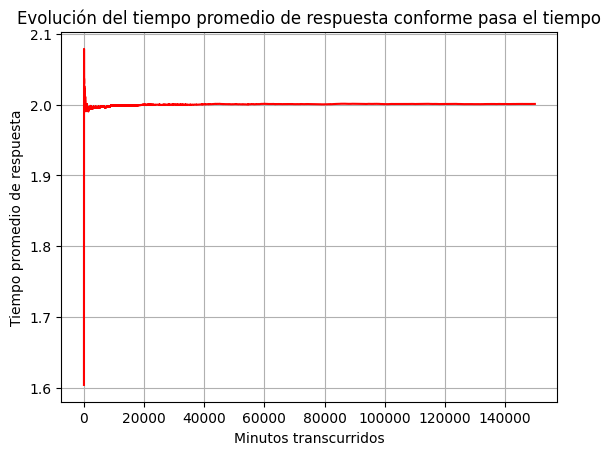

In [51]:
plt.plot(evol_prom, 'r')   
plt.xlabel('Minutos transcurridos')    
plt.ylabel('Tiempo promedio de respuesta')
plt.grid(True)
plt.title('Evolución del tiempo promedio de respuesta conforme pasa el tiempo')
plt.show()

In [52]:
T = 60000

In [53]:
print('mu =', np.mean(evol_prom), ', sigma =', np.std(evol_prom))

mu = 2.000216064962924 , sigma = 0.002226052496992187


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align*}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align*}

Implementamos el siguiente código:

In [54]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del promedio estimado.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [55]:
N = int(np.ceil((2*np.std(evol_prom)*norm.ppf(1-alpha/2)/epsilon)**2))
print(N)

1


In [56]:
def simulacion(N, T):
  prom = []
  for i in range(N):
    evol_prom = experimento(T)
    prom.append(np.mean(evol_prom))
  return prom

In [57]:
prom = simulacion(N, T)

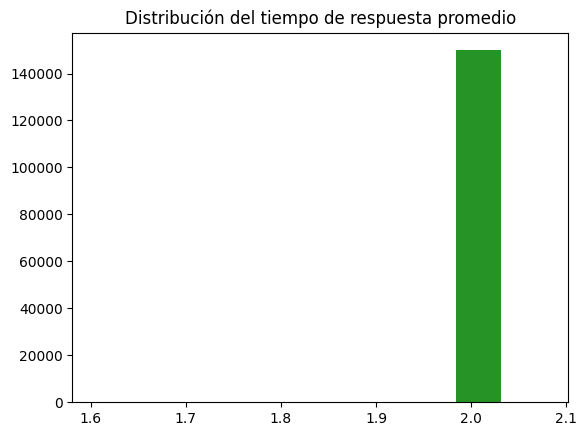

In [58]:
plt.hist(evol_prom, color = 'g', alpha = 0.85)
plt.title('Distribución del tiempo de respuesta promedio')
plt.show()

In [59]:
print('mu =', np.mean(prom), ', sigma =', np.std(prom))

mu = 1.999060822752074 , sigma = 0.0


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align*}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align*}

Implementamos el siguiente código:

In [60]:
mu = np.mean(prom)
li = mu - norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(T)
ls = mu + norm.ppf(1-alpha/2) * np.std(prom)/np.sqrt(T)
print(li, '<', mu, '<', ls)

1.999060822752074 < 1.999060822752074 < 1.999060822752074


## **8. Comparamos con la solución analítica.**

Gracias al teorema de la adición se sigue que

$$d_1 + d_2 + d_3 \sim \mathrm{N}(2 + 2.1 + 1.9, \sqrt{0.4^2 + 0.3^2 + 0.5^2}) = \mathrm{N}\left(6, \frac{\sqrt{2}}{2}\right)$$

Y gracias a las propiedades de la distribución normal obtenemos que

$$\frac{d_1 + d_2 + d_3}{3} \sim \mathrm{N}\left(\frac{1}{3}\cdot 6\,,\; \frac{1}{3}\cdot\frac{\sqrt{2}}{2}\right) = \mathrm{N}\left(2\,, \frac{\sqrt{2}}{6}\right)$$

En otras palabras, el tiempo promedio que tarda en terminar de atender una llamada un solo operador de la línea de emergencia es de dos minutos.

Por lo tanto, el tiempo promedio de respuesta de la central de emergencias es de $\,2\,$ minutos.


In [61]:
mu_ana = 2
print(mu_ana)

2


# **Solución**

In [62]:
print('El tiempo de respuesta promedio de la central de emergencias, estimado mediante simulación, es')
print('de ' + str(mu) + ' minutos.\n')
print('El cual difiere en un ' + str(abs(mu - mu_ana)*100 / mu_ana) + '% de la solución analítica.')

El tiempo de respuesta promedio de la central de emergencias, estimado mediante simulación, es
de 1.999060822752074 minutos.

El cual difiere en un 0.046958862396295764% de la solución analítica.
